In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# importing libraries 
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Loading Train-Validation-Test Datasets

In [4]:
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/X_train.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/y_train.npy')
X_val = np.load('/content/drive/MyDrive/Colab Notebooks/X_val.npy')
y_val = np.load('/content/drive/MyDrive/Colab Notebooks/y_val.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/y_test.npy')

# Create a Model Object

In [5]:
model = tf.keras.Sequential()

# Adding Convolution and Max Pooling Layers

In [6]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32, 32, 1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add more convolution and max pooling layers
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [7]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Model Training

In [8]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
43/43 [==============================] - 12s 248ms/step - loss: 2.0319 - accuracy: 0.2313 - val_loss: 1.7129 - val_accuracy: 0.3828
Epoch 2/50
43/43 [==============================] - 11s 247ms/step - loss: 1.7175 - accuracy: 0.3494 - val_loss: 1.4650 - val_accuracy: 0.5043
Epoch 3/50
43/43 [==============================] - 11s 252ms/step - loss: 1.5327 - accuracy: 0.4263 - val_loss: 1.2805 - val_accuracy: 0.5595
Epoch 4/50
43/43 [==============================] - 10s 244ms/step - loss: 1.3846 - accuracy: 0.4939 - val_loss: 1.1460 - val_accuracy: 0.5966
Epoch 5/50
43/43 [==============================] - 11s 245ms/step - loss: 1.2729 - accuracy: 0.5414 - val_loss: 1.0318 - val_accuracy: 0.6629
Epoch 6/50
43/43 [==============================] - 10s 243ms/step - loss: 1.1909 - accuracy: 0.5787 - val_loss: 0.9691 - val_accuracy: 0.6767
Epoch 7/50
43/43 [==============================] - 10s 241ms/step - loss: 1.1237 - accuracy: 0.6074 - val_loss: 0.8518 - val_accuracy: 0.7302

# Loss vs Epoch Graph

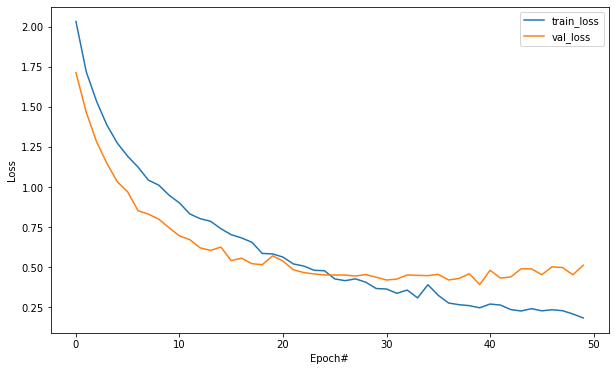

In [9]:
plt.figure(figsize=(10, 6))

# Plot the the training loss
plt.plot(results.history["loss"], label="train_loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")


# Name the x and y axises
plt.ylabel("Loss") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

# Accuracy vs Epoch Graph

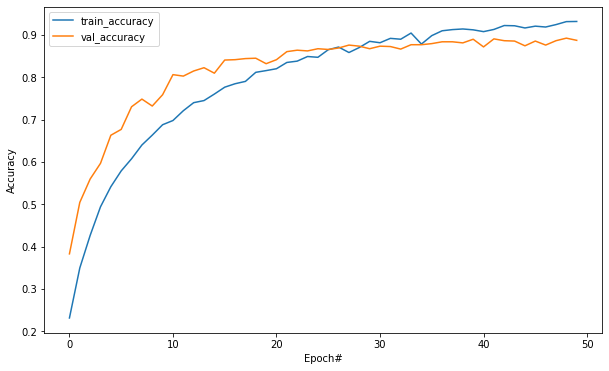

In [10]:
plt.figure(figsize=(10, 6))

# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="train_accuracy")


# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")


# Name the x and y axises
plt.ylabel("Accuracy") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [11]:
# Evaluate the performance
model.evaluate(X_test, y_test)

37/37 [==============================] - 1s 30ms/step - loss: 0.5986 - accuracy: 0.8828


[0.5985645055770874, 0.882758617401123]

# Prediction for Reshaped Sample

In [12]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1, 32, 32, 1))

# Print the prediction result
prediction_result

array([[4.2456495e-08, 2.6594909e-08, 1.2409567e-14, 4.0940363e-06,
        9.9961179e-01, 1.0341654e-08, 2.9019810e-07, 3.8390487e-04,
        3.7286556e-09, 9.1792511e-09]], dtype=float32)

# Finding Predicted Class and Probabilty

In [13]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

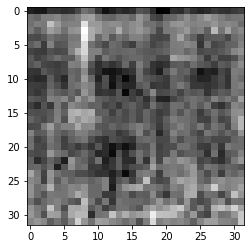

(32, 32)
This image belongs to class 4 with 0.9996117949485779 probability %
The actual class of the selected image is: [4]


In [14]:
plt.imshow(X_test[100], cmap="gray")
plt.show()

print(X_test[100].shape)

# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")
print(f"The actual class of the selected image is: {y_test[100]}")